In [1]:
import warnings
warnings.filterwarnings('ignore')

# visuals
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# models
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

# validation 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# metrics & evaluation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
from scipy import stats

print('Imports Complete')

Imports Complete


Using TensorFlow backend.


---

Data Exploration

This dataset has already been cleaned and preprocessed for modelling. This was done in the Data Preparation Notebook.

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(42)

In [3]:
# load the dataset
df = pd.read_csv('mod_dec21_dec22_prepared_.csv')
# df = dataframe.values
df.head()

,timestamp,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
0,2021-12-01 11:13:48,11,67959.0,6.80,1.0,NaN,NaN,NaN,1.0,12.0,2021.0
1,2021-12-01 11:16:16,11,67959.0,6.15,0.8,NaN,NaN,NaN,1.0,12.0,2021.0
2,2021-12-01 11:18:45,11,67959.0,5.97,0.8,NaN,NaN,NaN,1.0,12.0,2021.0
3,2021-12-01 11:23:44,11,67959.0,6.20,1.3,NaN,NaN,NaN,1.0,12.0,2021.0
4,2021-12-01 11:26:15,11,67959.0,4.65,0.8,NaN,NaN,NaN,1.0,12.0,2021.0


In [4]:
df.tail()

,timestamp,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
1316743,2022-12-06 23:58:29,23,67961.5,19.250,10.93,101580.81,3.950,100.00,6.0,12.0,2022.0
1316744,2022-12-06 23:58:43,23,67955.5,18.270,8.65,101676.44,2.750,100.00,6.0,12.0,2022.0
1316745,2022-12-06 23:59:29,23,67959.0,33.670,15.60,101576.00,2.835,100.00,6.0,12.0,2022.0
1316746,2022-12-06 23:59:30,23,67960.0,23.485,11.50,101475.56,2.920,100.00,6.0,12.0,2022.0
1316747,2022-12-06 23:59:49,23,67993.5,13.300,7.40,101658.63,7.510,74.25,6.0,12.0,2022.0


In [5]:
df.shape

(1316748, 11)

In [6]:
# df["timestamp"] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df['timestamp'] = pd.to_datetime(df['timestamp'],infer_datetime_format=True)

df.sort_values(by=['timestamp'], inplace=False)

,timestamp,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
0,2021-12-01 11:13:48,11,67959.0,6.800,1.00,NaN,NaN,NaN,1.0,12.0,2021.0
1,2021-12-01 11:16:16,11,67959.0,6.150,0.80,NaN,NaN,NaN,1.0,12.0,2021.0
2,2021-12-01 11:18:45,11,67959.0,5.970,0.80,NaN,NaN,NaN,1.0,12.0,2021.0
3,2021-12-01 11:23:44,11,67959.0,6.200,1.30,NaN,NaN,NaN,1.0,12.0,2021.0
4,2021-12-01 11:26:15,11,67959.0,4.650,0.80,NaN,NaN,NaN,1.0,12.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
1316743,2022-12-06 23:58:29,23,67961.5,19.250,10.93,101580.81,3.950,100.00,6.0,12.0,2022.0
1316744,2022-12-06 23:58:43,23,67955.5,18.270,8.65,101676.44,2.750,100.00,6.0,12.0,2022.0
1316745,2022-12-06 23:59:29,23,67959.0,33.670,15.60,101576.00,2.835,100.00,6.0,12.0,2022.0
1316746,2022-12-06 23:59:30,23,67960.0,23.485,11.50,101475.56,2.920,100.00,6.0,12.0,2022.0


In [7]:
df.head()

,timestamp,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
0,2021-12-01 11:13:48,11,67959.0,6.80,1.0,NaN,NaN,NaN,1.0,12.0,2021.0
1,2021-12-01 11:16:16,11,67959.0,6.15,0.8,NaN,NaN,NaN,1.0,12.0,2021.0
2,2021-12-01 11:18:45,11,67959.0,5.97,0.8,NaN,NaN,NaN,1.0,12.0,2021.0
3,2021-12-01 11:23:44,11,67959.0,6.20,1.3,NaN,NaN,NaN,1.0,12.0,2021.0
4,2021-12-01 11:26:15,11,67959.0,4.65,0.8,NaN,NaN,NaN,1.0,12.0,2021.0


In [8]:
df.tail()

,timestamp,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
1316743,2022-12-06 23:58:29,23,67961.5,19.250,10.93,101580.81,3.950,100.00,6.0,12.0,2022.0
1316744,2022-12-06 23:58:43,23,67955.5,18.270,8.65,101676.44,2.750,100.00,6.0,12.0,2022.0
1316745,2022-12-06 23:59:29,23,67959.0,33.670,15.60,101576.00,2.835,100.00,6.0,12.0,2022.0
1316746,2022-12-06 23:59:30,23,67960.0,23.485,11.50,101475.56,2.920,100.00,6.0,12.0,2022.0
1316747,2022-12-06 23:59:49,23,67993.5,13.300,7.40,101658.63,7.510,74.25,6.0,12.0,2022.0


Overall, the data set has over a million records of measurements per minute with 11 columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316748 entries, 0 to 1316747
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   timestamp    1316748 non-null  datetime64[ns]
 1   hour         1316748 non-null  int64         
 2   sensor_id    1316748 non-null  float64       
 3   P1           1316748 non-null  float64       
 4   P2           1316748 non-null  float64       
 5   pressure     1316255 non-null  float64       
 6   temperature  1316255 non-null  float64       
 7   humidity     1316255 non-null  float64       
 8   day          1316748 non-null  float64       
 9   month        1316748 non-null  float64       
 10  year         1316748 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 110.5 MB


Below we set the group the data by hour. By doing that, we shrink the data to just over 8K rows.

In [10]:
# print info to check conversion
df = df.set_index('timestamp').resample('H').mean() # set date as index or rest_index() .resample('5min').mean()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8893 entries, 2021-12-01 11:00:00 to 2022-12-06 23:00:00
Freq: H
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         8330 non-null   float64
 1   sensor_id    8330 non-null   float64
 2   P1           8330 non-null   float64
 3   P2           8330 non-null   float64
 4   pressure     8309 non-null   float64
 5   temperature  8309 non-null   float64
 6   humidity     8309 non-null   float64
 7   day          8330 non-null   float64
 8   month        8330 non-null   float64
 9   year         8330 non-null   float64
dtypes: float64(10)
memory usage: 764.2 KB


In [12]:
df.head()

,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
timestamp,,,,,,,,,,
2021-12-01 11:00:00,11.0,67959.0,5.918750,0.921250,NaN,NaN,NaN,1.0,12.0,2021.0
2021-12-01 12:00:00,12.0,67959.0,6.340000,0.891176,NaN,NaN,NaN,1.0,12.0,2021.0
2021-12-01 13:00:00,13.0,67959.0,7.080000,0.987000,NaN,NaN,NaN,1.0,12.0,2021.0
2021-12-01 14:00:00,14.0,67959.0,11.604091,1.667273,NaN,NaN,NaN,1.0,12.0,2021.0
2021-12-01 15:00:00,15.0,67959.0,13.948500,2.034500,NaN,NaN,NaN,1.0,12.0,2021.0


In [13]:
df.tail()

,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
timestamp,,,,,,,,,,
2022-12-06 19:00:00,19.0,67966.827114,9.824515,5.174757,101612.213190,5.828451,92.733433,6.0,12.0,2022.0
2022-12-06 20:00:00,20.0,67967.959732,12.462634,6.818859,101621.297785,5.795403,92.526711,6.0,12.0,2022.0
2022-12-06 21:00:00,21.0,67968.278523,14.505705,7.973121,101606.998859,5.779866,92.406711,6.0,12.0,2022.0
2022-12-06 22:00:00,22.0,67967.442029,16.657174,8.854710,101611.657500,5.242500,92.941957,6.0,12.0,2022.0
2022-12-06 23:00:00,23.0,67967.000000,18.115521,9.781424,101604.348264,4.554861,93.283785,6.0,12.0,2022.0


In [14]:
df.shape

(8893, 10)

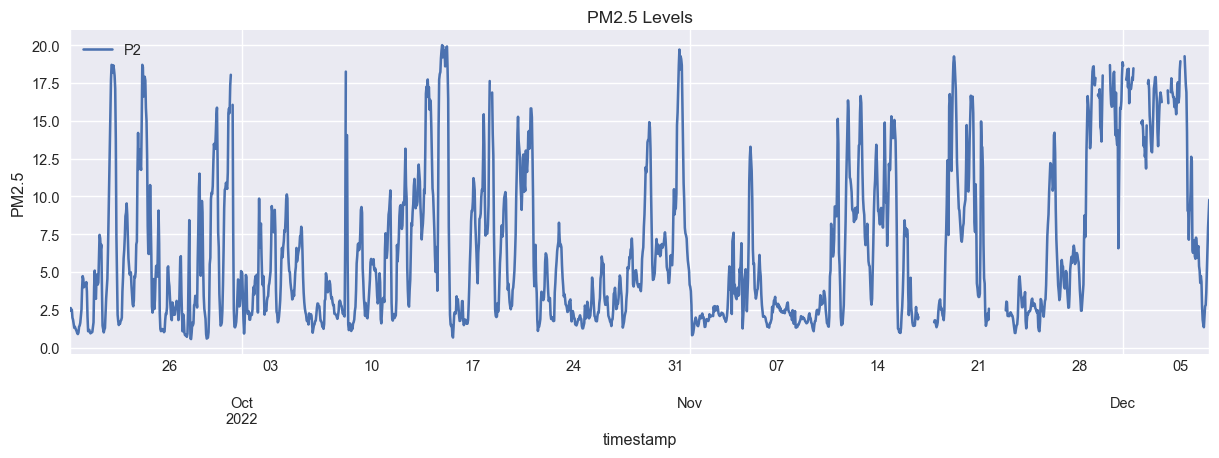

In [15]:
plt.figure(dpi=105,figsize=(14,4))
df["P2"].iloc[7000:8893].plot(legend=True)
# df["P2"].iloc[1300000:1316748].plot(legend=True)
# plt.legend(['Training set (40000 Hours)','Test set'])
plt.title('PM2.5 Levels')
plt.ylabel("PM2.5")
plt.show()

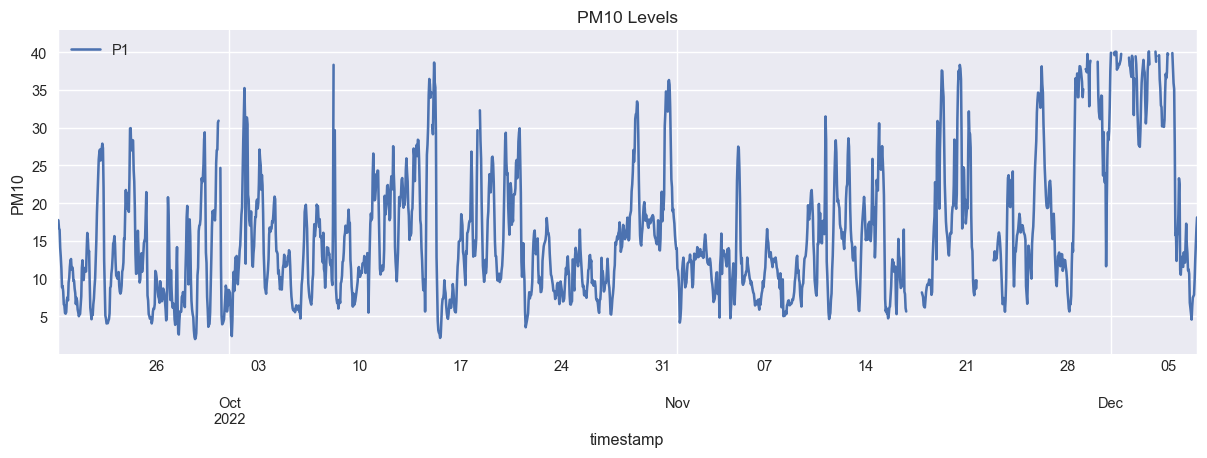

In [16]:
plt.figure(dpi=105,figsize=(14,4))
df["P1"].iloc[7000:8893].plot(legend=True)
# df["P1"].iloc[1300000:1316748].plot(legend=True)
plt.title('PM10 Levels')
plt.ylabel("PM10")
plt.show()

Above we see the plot of PM2.5 and PM10. Looks very similar but still slightly different.

In [17]:
fig = px.histogram(df, x=df["P1"])

fig.update_layout(
    title={
        'text': "Distribution of PM10 values registered by sensors in various location in Eindhoven",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(showgrid=False)  # turning off the grid
fig.show()

# ----------

fig2 = px.histogram(df, x=df["P2"])

fig2.update_layout(
    title={
        'text': "Distribution of PM2.5 values registered by sensors in various location in Eindhoven",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.update_yaxes(showgrid=False)  # turning off the grid
fig2.show()

Below we will use a heatmap to have a overview of the correlation between the fetaures. The darker the color, the more correlation.

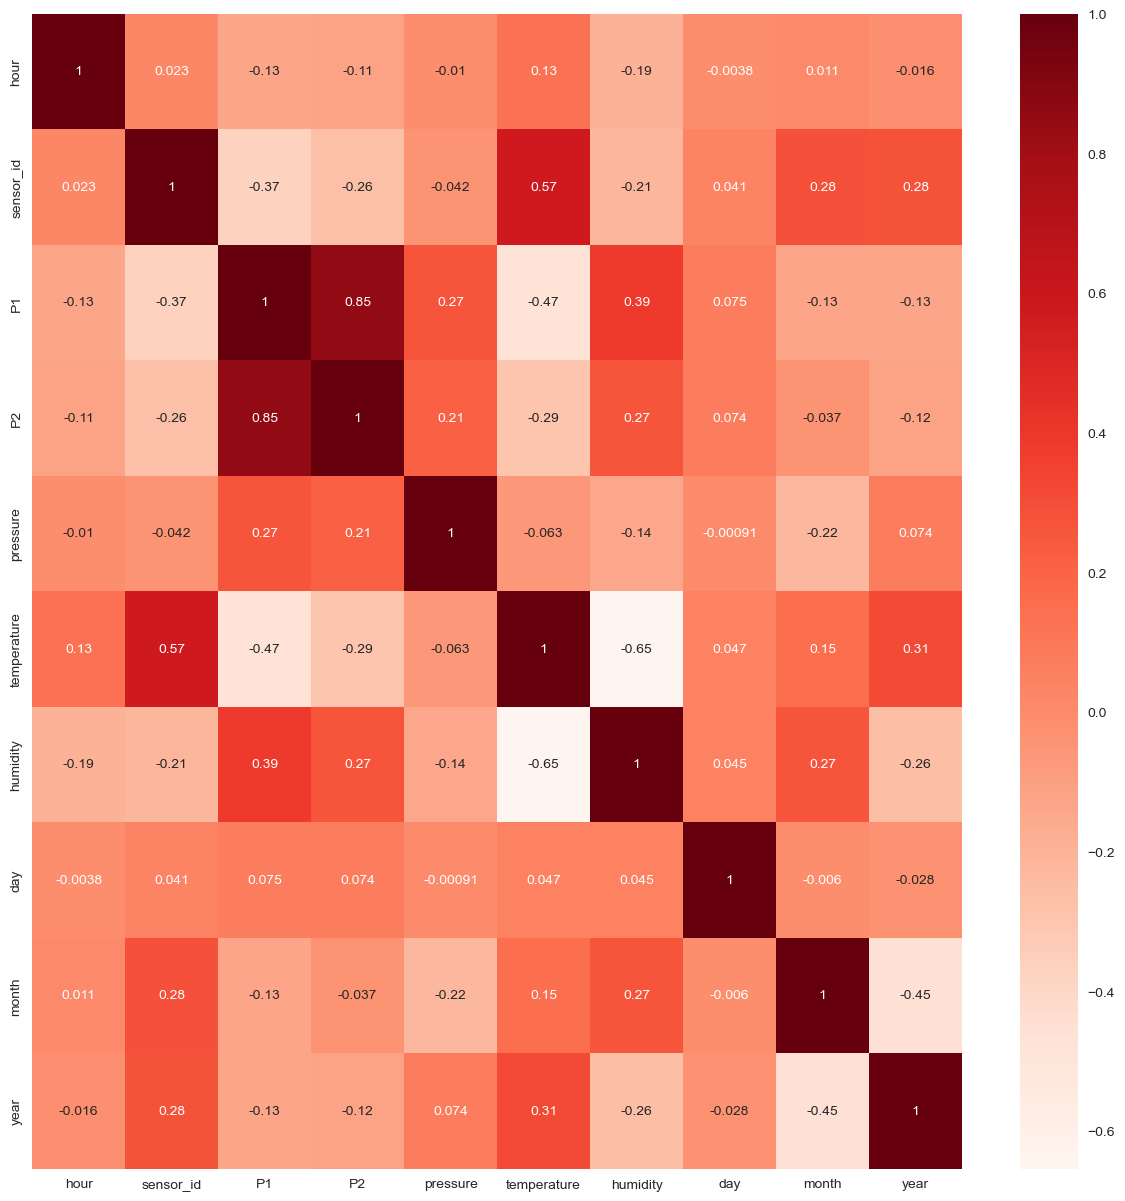

In [18]:

plt.figure(figsize=(15,15))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

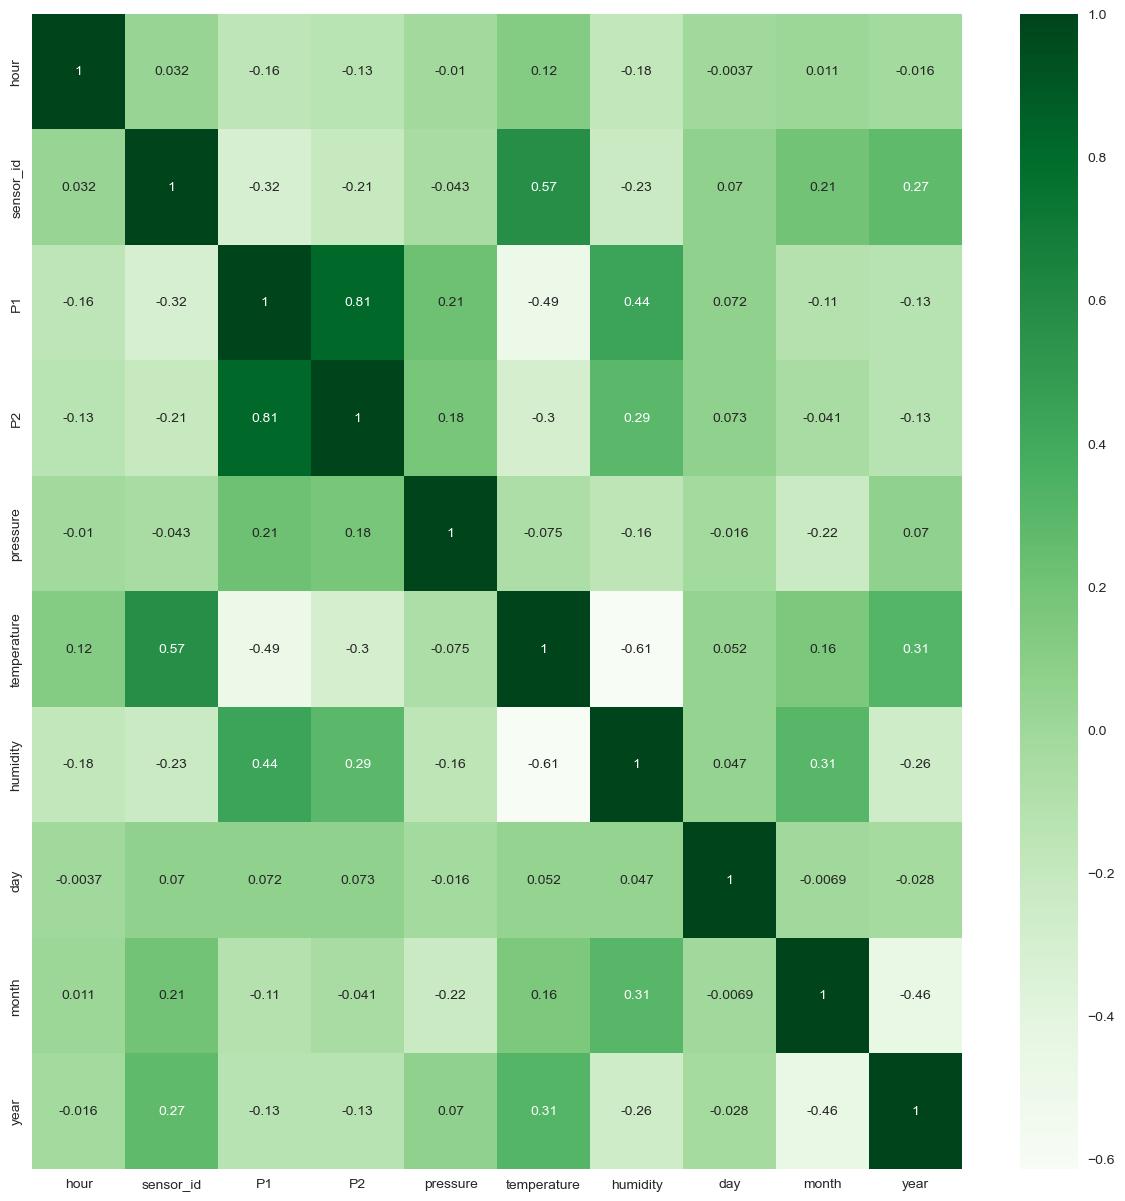

In [19]:
plt.figure(figsize=(15,15))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

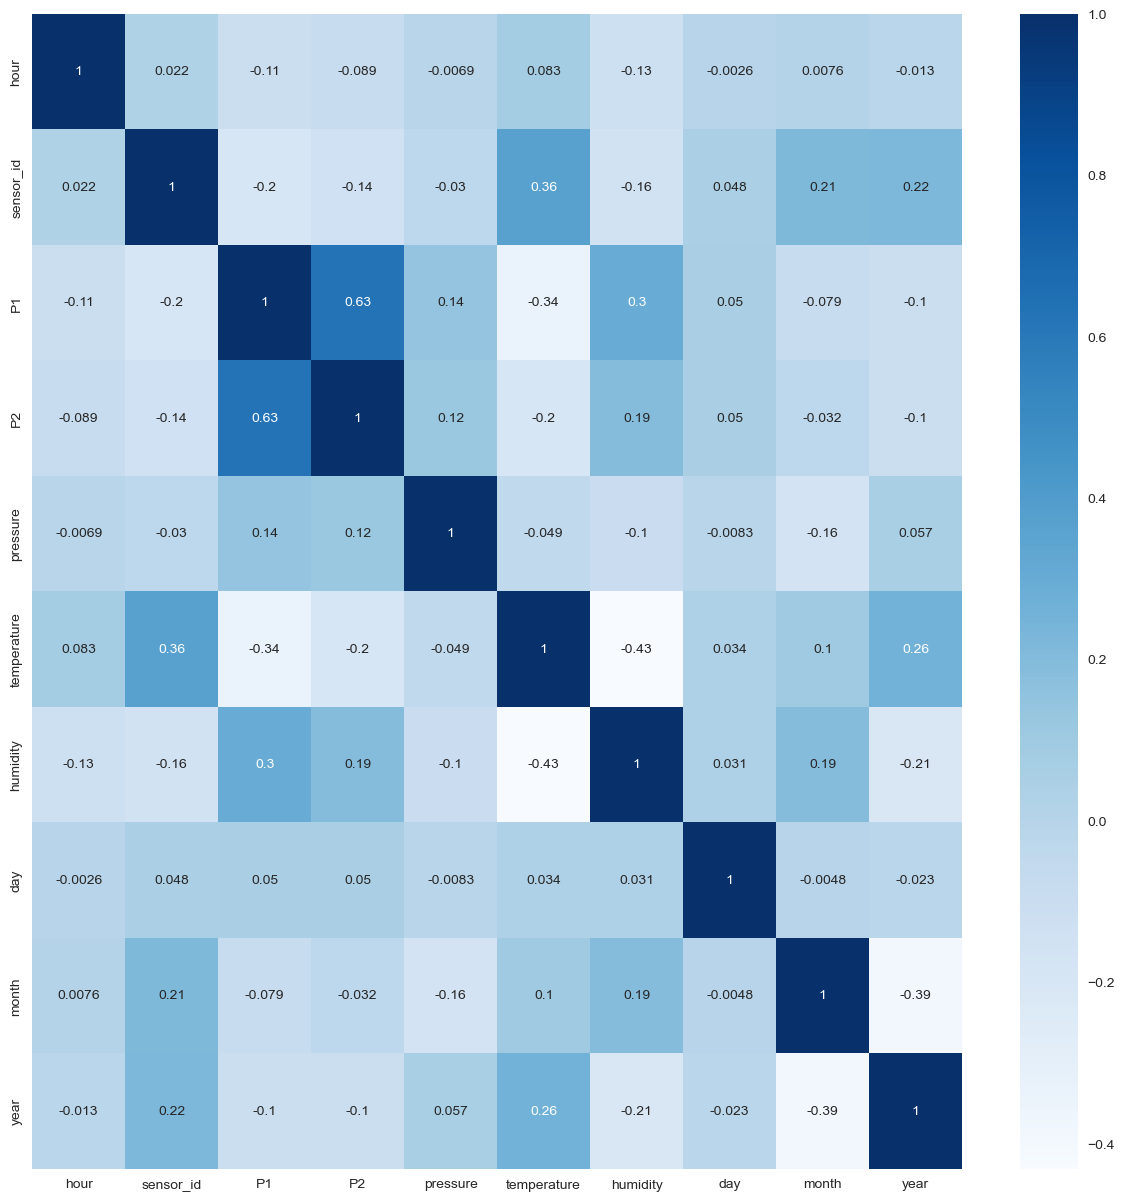

In [20]:
plt.figure(figsize=(15,15))
cor = df.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

The PM values are heavily correlated with each other, as expected.

---

Splitting datasets

In [21]:
df.columns

Index(['hour', 'sensor_id', 'P1', 'P2', 'pressure', 'temperature', 'humidity',
       'day', 'month', 'year'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8893 entries, 2021-12-01 11:00:00 to 2022-12-06 23:00:00
Freq: H
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         8330 non-null   float64
 1   sensor_id    8330 non-null   float64
 2   P1           8330 non-null   float64
 3   P2           8330 non-null   float64
 4   pressure     8309 non-null   float64
 5   temperature  8309 non-null   float64
 6   humidity     8309 non-null   float64
 7   day          8330 non-null   float64
 8   month        8330 non-null   float64
 9   year         8330 non-null   float64
dtypes: float64(10)
memory usage: 764.2 KB


In [23]:
df.shape

(8893, 10)

Scale the dataset for LSTM

In [24]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
for col in df.columns:
    if col == 'P2' and col == 'P1':
        continue
    else:
        df[col] = min_max_scaler.fit_transform(df[[col]])

In [25]:
# convert multiple records into 1 record having history of last n hours of data as attributes
def transform_data_many_to_one (data, columns, time_steps=1):
    n_vars = data.shape[1]
    dataset = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(time_steps, 0, -1):
        cols.append(dataset.shift(i))
        names += [('{}(t-{})'.format(columns[j], i)) for j in range(n_vars)] 
    cols.append(dataset.shift(-0))
    names += [('{}(t)'.format(columns [j])) for j in range(n_vars)]
    new_df = pd.concat(cols, axis=1)
    new_df.columns = names
    new_df. dropna(inplace=True)
    return new_df

In [26]:
df.head()

,hour,sensor_id,P1,P2,pressure,temperature,humidity,day,month,year
timestamp,,,,,,,,,,
2021-12-01 11:00:00,0.478261,0.002918,0.100451,0.021469,NaN,NaN,NaN,0.0,1.0,0.0
2021-12-01 12:00:00,0.521739,0.002918,0.111201,0.019940,NaN,NaN,NaN,0.0,1.0,0.0
2021-12-01 13:00:00,0.565217,0.002918,0.130084,0.024811,NaN,NaN,NaN,0.0,1.0,0.0
2021-12-01 14:00:00,0.608696,0.002918,0.245531,0.059394,NaN,NaN,NaN,0.0,1.0,0.0
2021-12-01 15:00:00,0.652174,0.002918,0.305356,0.078062,NaN,NaN,NaN,0.0,1.0,0.0


In [27]:
# remove unused columns.
df.drop(['sensor_id', 'day', 'month', 'year', 'hour', 'pressure', 'temperature', 'humidity'], axis=1, inplace=True)

In [28]:
df.head()

,P1,P2
timestamp,,
2021-12-01 11:00:00,0.100451,0.021469
2021-12-01 12:00:00,0.111201,0.019940
2021-12-01 13:00:00,0.130084,0.024811
2021-12-01 14:00:00,0.245531,0.059394
2021-12-01 15:00:00,0.305356,0.078062


In [29]:
values = df.values
values = values.astype('float32')
n_hours = 1
transformed_df = transform_data_many_to_one (values, df.columns, n_hours)
transformed_df.drop(['P1(t)', 'P2(t)'], axis=1, inplace=True) 
transformed_df.reset_index (drop=True, inplace=True) 

In [30]:
transformed_df.shape

(8237, 2)

In [31]:
transformed_df.head()

,P1(t-1),P2(t-1)
0,0.100451,0.021469
1,0.111201,0.019940
2,0.130084,0.024811
3,0.245531,0.059394
4,0.305356,0.078062


In [32]:
values = transformed_df.values
n_features = transformed_df.shape[1]
n_train_hours = int(len(transformed_df)*0.8)
n_attributes = n_hours * n_features

train = values[:n_train_hours, :]
# validate = values[n_train_hours:, :] #kept 1 year data for validation
test = values[n_train_hours:, :] # 1 year data for test

train_X, train_y = train[:,:n_attributes], train[:,-1]
test_X, test_y = test[:,:n_attributes], test[:,-1]
# validate_X, validate_y = validate[:,:n_attributes], validate[:,-1]

train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
# validate_X = validate_X.reshape((validate_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Print data shape
print('number of attributes: ', n_attributes)
print('number of features: ', n_features)
print('number of hours;/window/lookback: ', n_hours)
print('train_X.shape: ', train_X.shape)
print('train_y.shape: ', train_y.shape)
print('test_X.shape: ', test_X.shape) 
print('test_y.shape: ', test_y.shape)
# print('validate_X.shape: ', validate_X.shape) 
# print('validate_y.shape: ', validate_y.shape)

number of attributes:  2
number of features:  2
number of hours;/window/lookback:  1
train_X.shape:  (6589, 1, 2)
train_y.shape:  (6589,)
test_X.shape:  (1648, 1, 2)
test_y.shape:  (1648,)


Model

2023-01-11 15:46:18.153146: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 15:46:18.153636: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


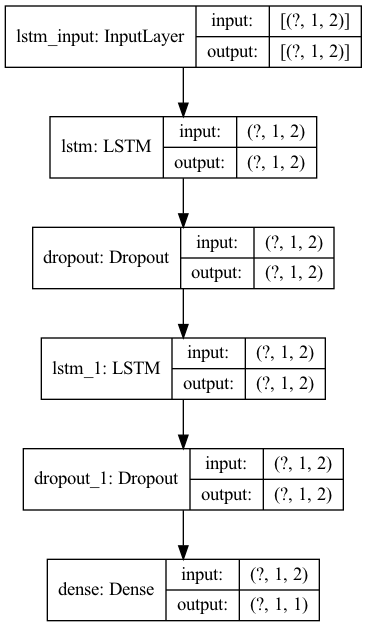

In [33]:
model = Sequential()
model.add(LSTM(2, return_sequences = True, input_shape=(n_hours, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(2, return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse') 

tf.keras.utils.plot_model(model=model, show_shapes=True)

Train model and plot evaluation results 

Train on 5271 samples, validate on 1318 samples
Epoch 1/5


2023-01-11 15:46:21.686615: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_4880_5365_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_6006' and '__inference___backward_cudnn_lstm_with_fallback_4525_4707' both implement 'lstm_6c52b04a-11ea-4ede-8c99-4b38f62d430d' but their signatures do not match.


5264/5271 [============================>.] - ETA: 0s - loss: 0.0878

2023-01-11 15:46:26.873905: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_6967' and '__inference_standard_lstm_6856_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_7680' both implement 'lstm_9bc4594b-4523-4918-b321-b85eeb838da8' but their signatures do not match.


5271/5271 [==============================] - 9s 2ms/sample - loss: 0.0878 - val_loss: 0.0344
Epoch 2/5
5271/5271 [==============================] - 2s 446us/sample - loss: 0.0493 - val_loss: 0.0263
Epoch 3/5
5271/5271 [==============================] - 2s 447us/sample - loss: 0.0357 - val_loss: 0.0156
Epoch 4/5
5271/5271 [==============================] - 2s 448us/sample - loss: 0.0257 - val_loss: 0.0081
Epoch 5/5
5271/5271 [==============================] - 2s 442us/sample - loss: 0.0189 - val_loss: 0.0050

 



2023-01-11 15:46:37.664784: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_11396' and '__inference_standard_lstm_11396_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_12193' both implement 'lstm_7aaa2bc5-9f60-49d0-af4f-fd7a2757ca2d' but their signatures do not match.


LSTM Model Evaluation Report: 
Mean Absolute Error(MAE) of LSTM Model : 0.060889676
Mean Absolute Percentage Error (MAPE) of LSTM Model : 0.51925695
Mean Squared Error(MSE) of LSTM Model : 0.00510778
Root Mean Squared Error (RMSE) of LSTM Model : 0.07146873
R2 Score of LSTM Model : 0.92

 



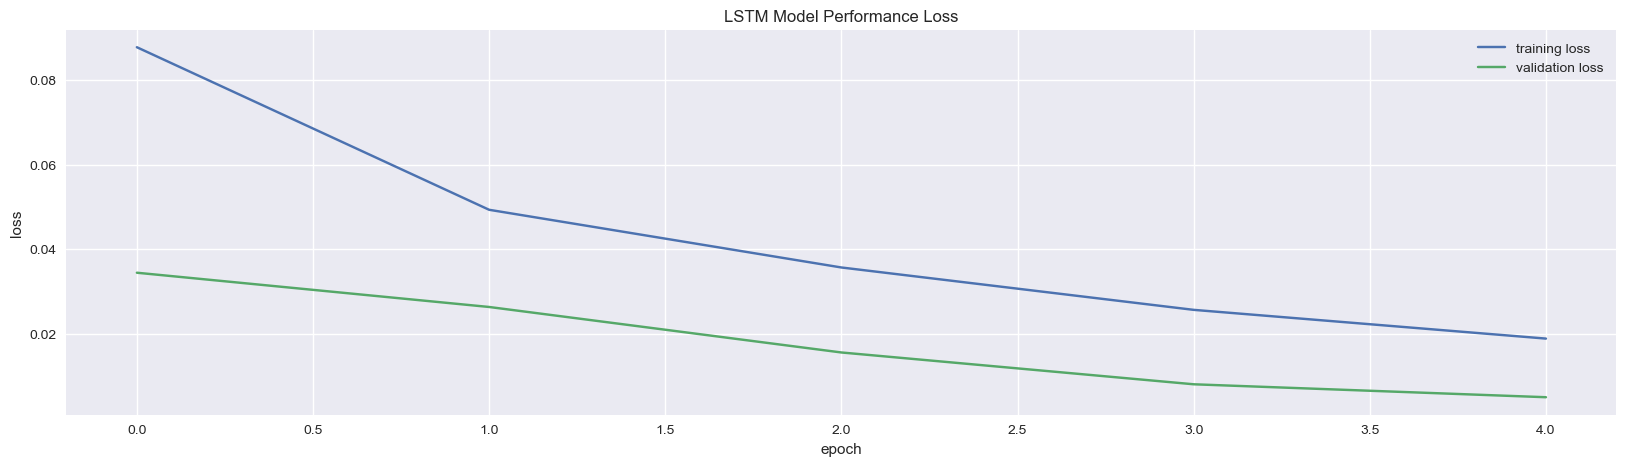

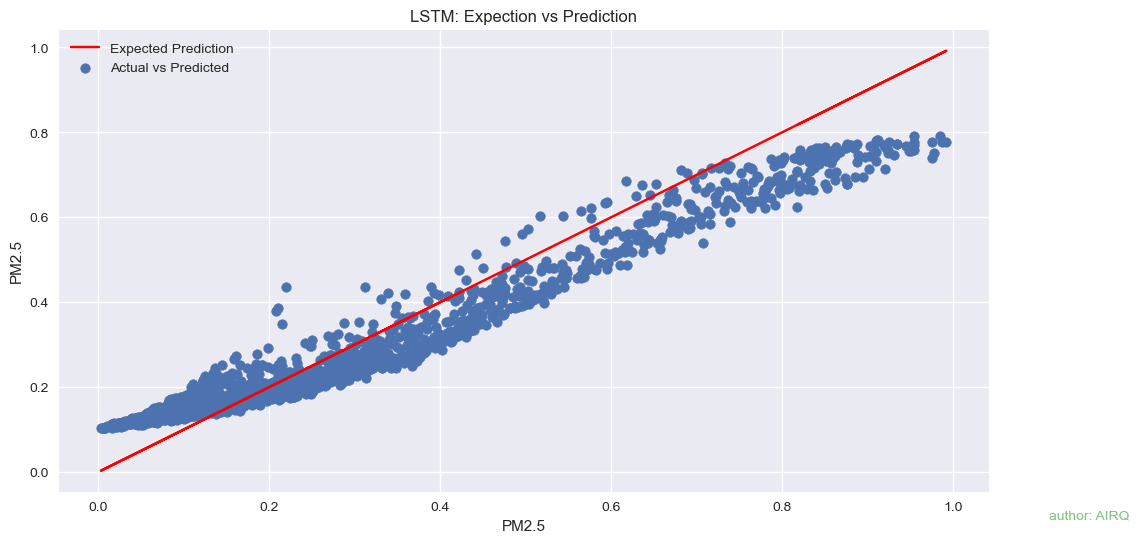

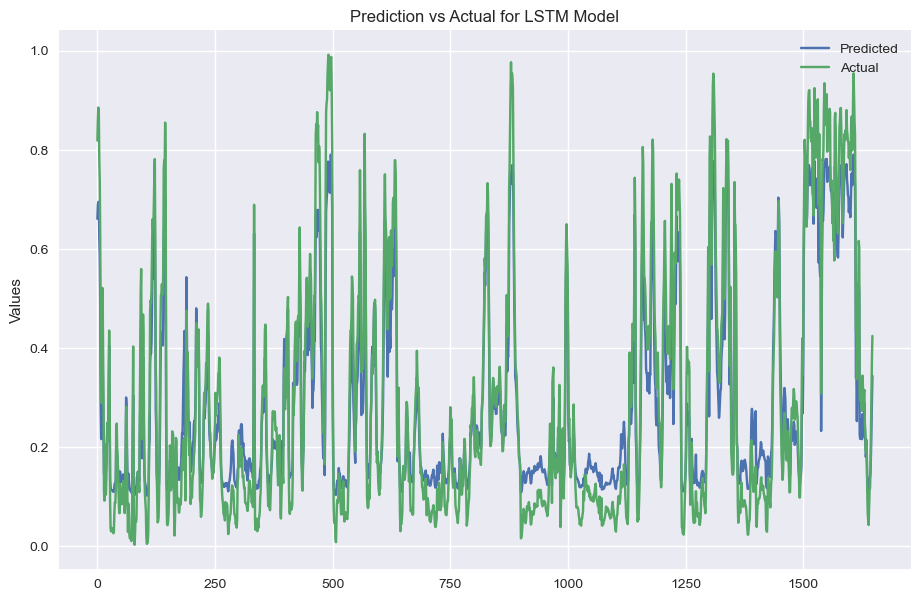

In [34]:
def model_train_evaluation(X, y, model, model_name):
    #Model run

    # early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
    # lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
    history = model.fit(train_X, train_y, epochs=5, batch_size=16, validation_split=0.2, verbose=1, shuffle=False)
    history_frame = pd.DataFrame(history.history)
    print('\n \n')
    
    # Model Evaluation metrics
    ypred = model.predict(X).flatten()
    print("LSTM Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Absolute Percentage Error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    # print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 Score of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')

    # model performance plot
    plt.figure(figsize=(20,5),dpi=100)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='best')
    plt.title(model_name + ' Performance Loss')
    plt.show()
    print('\n \n')
    
    # Actual vs Predicted Plot
    f, ax = plt.subplots(figsize=(12,6),dpi=100);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # predictions
    plt.xlabel('PM2.5')
    plt.ylabel('PM2.5')
    plt.title('LSTM: Expection vs Prediction')
    plt.plot(y,y,'r', label="Expected Prediction")
    plt.legend()
    f.text(0.95, 0.06, 'author: AIRQ',
    fontsize=10, color='green',
    ha='left', va='bottom', alpha=0.5);
    print('\n \n')
    
    # Plot test data vs prediction
    plt.figure(dpi=100, figsize = (11, 7))
    range_future = len(ypred)
    plt.plot(np.arange(range_future), np.array(ypred),label='Predicted values')
    plt.plot(np.arange(range_future), np.array(y), label='Actual values')
    plt.title('Prediction vs Actual for ' + model_name)
    plt.legend(['Predicted', 'Actual'], loc='upper right')
    plt.ylabel('Values')
    print('\n \n')

model_train_evaluation(test_X, test_y, model, 'LSTM Model')

Save model

In [38]:
model.save("lstm_model_v5.h5")

Load model and check values. This block of code can also be used on a validation set to check the predicted value against the actual values. 

In [39]:
loaded_model = tf.keras.models.load_model('lstm_model_v3.h5')
train_predictions = loaded_model.predict(train_X).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actual':train_y})
train_results.head()

,Train Predictions,Actual
0,0.810553,0.899267
1,0.801528,0.854910
2,0.799165,0.835224
3,0.791139,0.792853
4,0.775569,0.746143
